In [9]:
%pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'F:\\New folder\\Amazon Sale Report.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.columns)  # List all column names
print(df.head())
print(df.info())


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Ama

In [2]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as necessary
df.fillna(0, inplace=True)

# Convert columns to appropriate data types
df['Date'] = pd.to_datetime(df['Date'])

# Drop duplicates if any
df.drop_duplicates(inplace=True)


index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_3012\273952537.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [3]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as necessary
df.fillna(0, inplace=True)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Ensure 'Qty' is numeric
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')

# Create 'year_month' column for sales overview
df['year_month'] = df['Date'].dt.to_period('M')


index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
New                   0
PendingS              0
dtype: int64


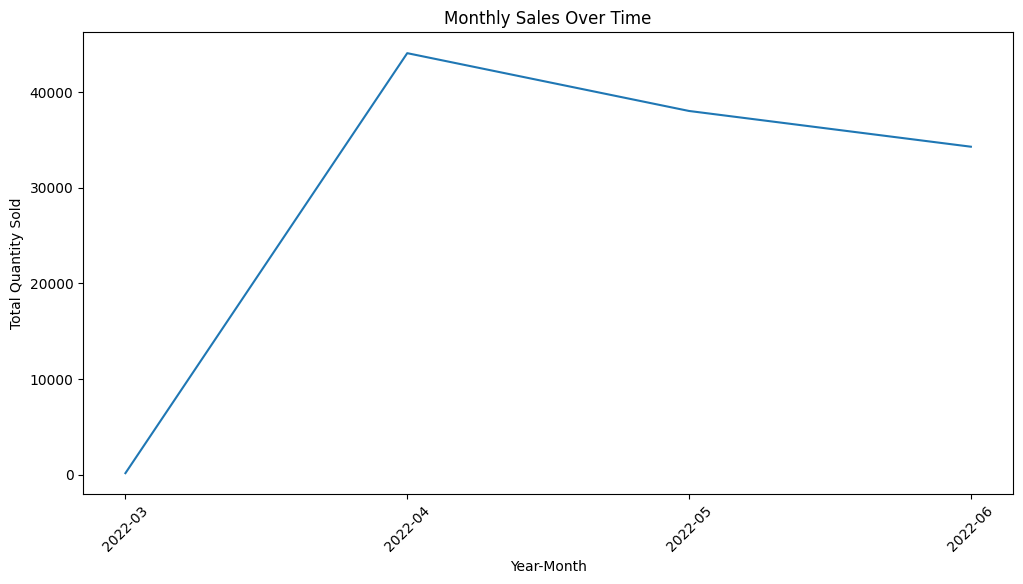

In [4]:
# Convert 'year_month' to string for plotting
df['year_month'] = df['year_month'].astype(str)

# Group by 'year_month' and sum 'Qty'
monthly_sales = df.groupby('year_month')['Qty'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='year_month', y='Qty')
plt.title('Monthly Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_11440\379941598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Category', y='Qty',palette='viridis')


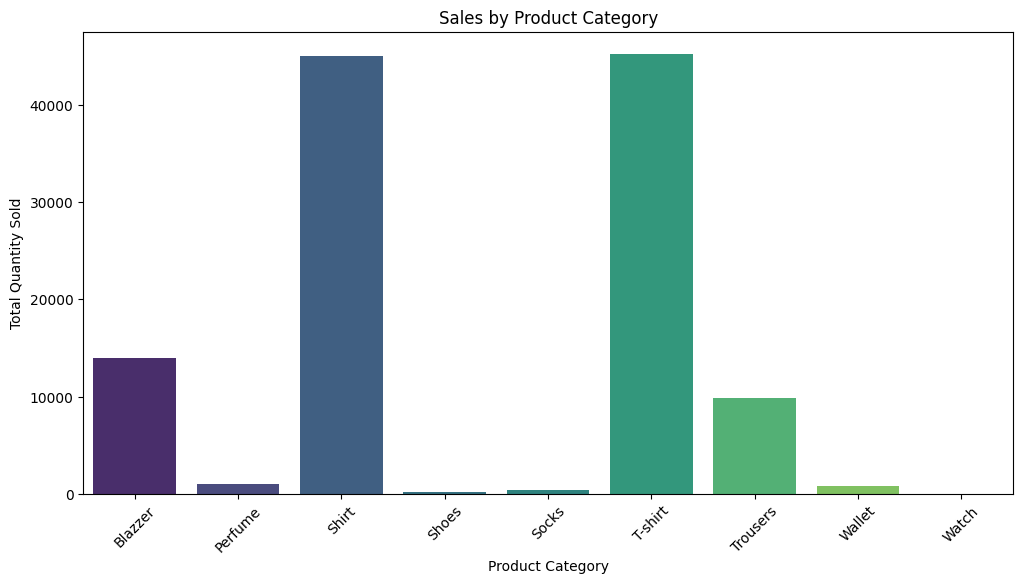

C:\Users\Admin\AppData\Local\Temp\ipykernel_11440\379941598.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=size_sales, x='Size', y='Qty', palette='plasma')


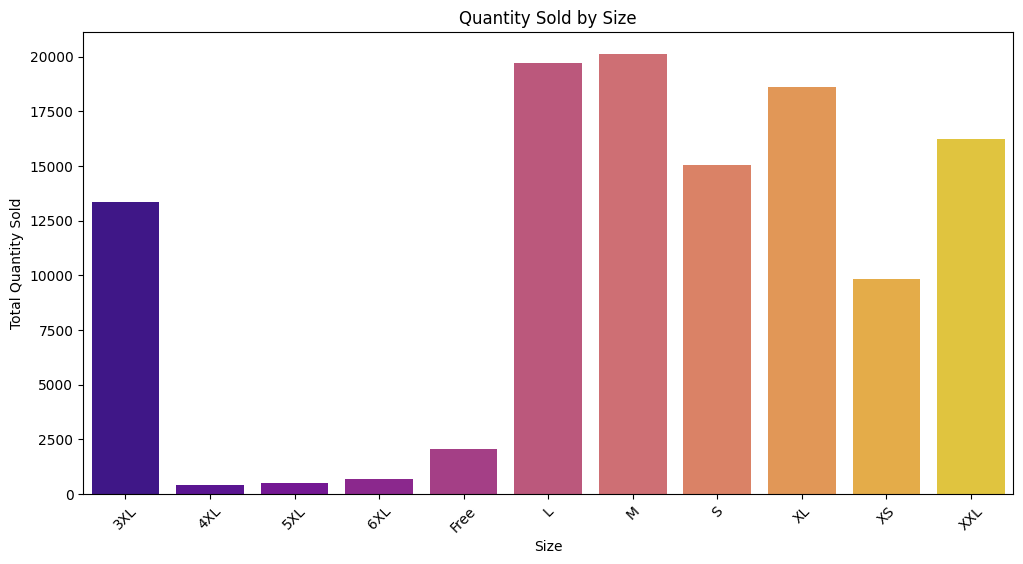

In [5]:
# Product category analysis
category_sales = df.groupby('Category')['Qty'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='Category', y='Qty',palette='viridis')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Size analysis
size_sales = df.groupby('Size')['Qty'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=size_sales, x='Size', y='Qty', palette='plasma')
plt.title('Quantity Sold by Size')
plt.xlabel('Size')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_11440\3408253701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fulfillment_sales, x='Fulfilment', y='Qty', palette='plasma')


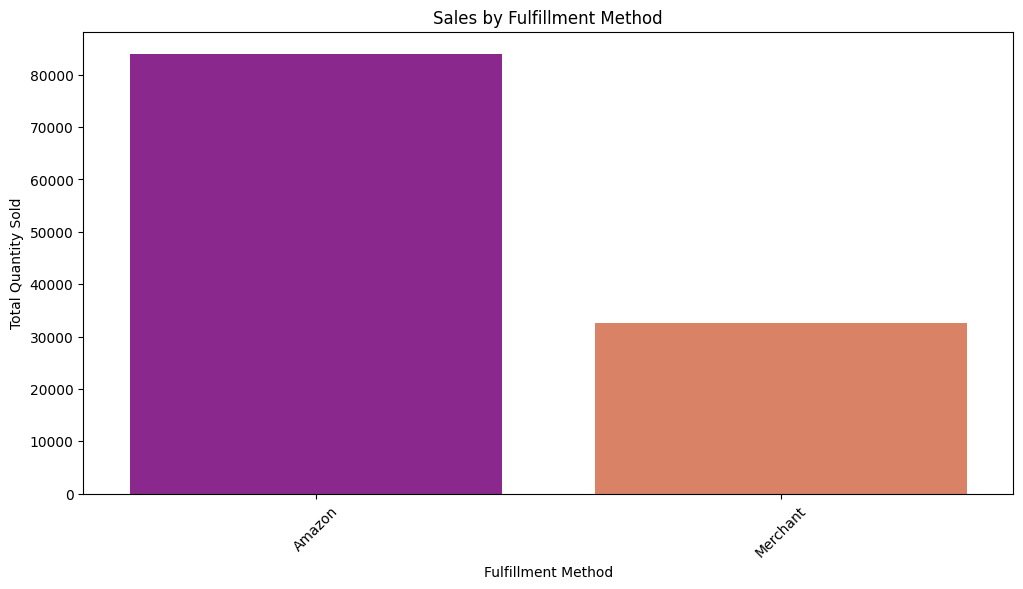

In [6]:
# Fulfillment method analysis
fulfillment_sales = df.groupby('Fulfilment')['Qty'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=fulfillment_sales, x='Fulfilment', y='Qty', palette='plasma')
plt.title('Sales by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_11440\3200860173.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales, x='ship-state', y='Qty', palette='plasma')


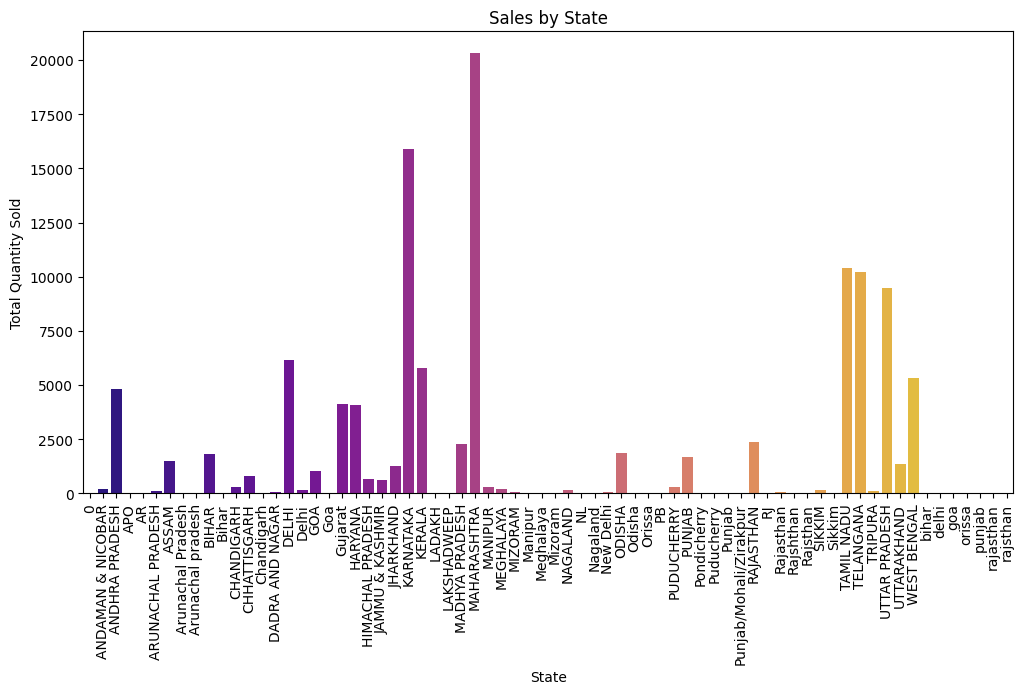

In [7]:
# Geographical analysis
state_sales = df.groupby('ship-state')['Qty'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=state_sales, x='ship-state', y='Qty', palette='plasma')
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11440\2139138891.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_sales, x='segment', palette='plasma')


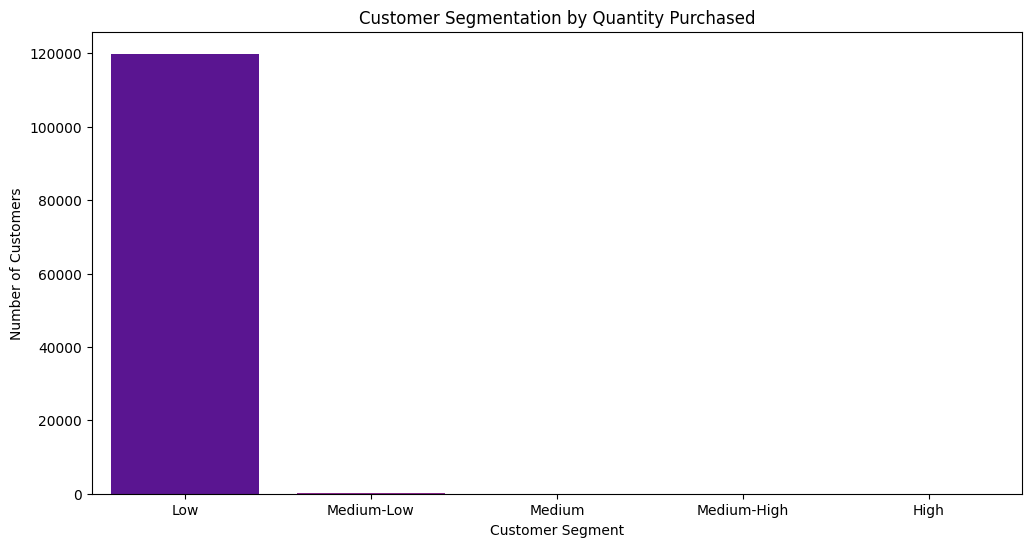

In [8]:
# Customer segmentation
customer_sales = df.groupby('Order ID')['Qty'].sum().reset_index()
customer_segments = pd.cut(customer_sales['Qty'], bins=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

customer_sales['segment'] = customer_segments

plt.figure(figsize=(12, 6))
sns.countplot(data=customer_sales, x='segment', palette='plasma')
plt.title('Customer Segmentation by Quantity Purchased')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()
